In [1]:
from libs.efficient_lib.efficient_model import EfficientModel
    
nx, ny, nz = 64, 64, 64
n_patterns = 4

EM = EfficientModel(nx, ny, nz, n_patterns)
EM.propagate_dmd()

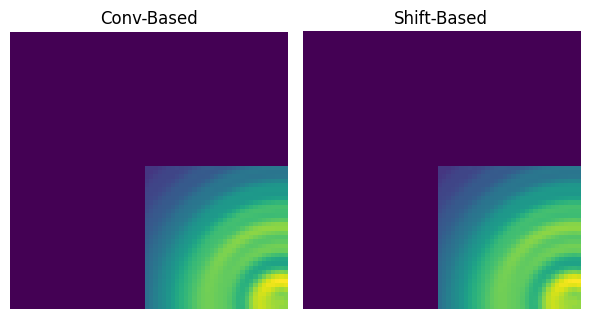

In [31]:
from libs.forward_lib.physical_model import conv_3D
import torch
from libs.forward_lib.visualizer import visualize_vectors, show_images

lz, lx, ly = 63, 63, 63
I = torch.zeros(1, nz, nx, ny).to(device='cuda')
I[0, lz, lx,ly] = EM.H2[lz, lx, ly]

y_re = conv_3D(EM.emPSF_3D, I, w=2)[0]
# show_images(y_re.abs().detach().cpu().numpy()[::4], v_range=[y_re.abs().min(), y_re.abs().max()])
measure = y_re[32].abs()
measure2 = EM.propagate_object((lx, ly, lz))
show_images([measure.detach().cpu().numpy(), measure2.detach().cpu().numpy()], cols=2, figsize=(6, 12), titles=["Conv-Based", "Shift-Based"])

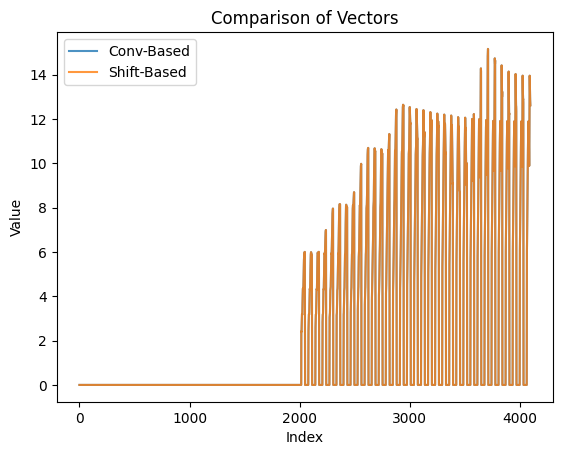

In [32]:
visualize_vectors([measure.flatten().detach().cpu().numpy(), measure2.flatten().detach().cpu().numpy()], titles=["Conv-Based", "Shift-Based"])